# <center> PFE-Scraping

In [44]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [45]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRtTUc6KeZ1YZ74AKHeiazI-r-axUry4HvOLB2GOhB6Od9tlaS2FUaTujt2iPbC6_iFVwkry9kW-j7_/pubhtml?gid=589152417&single=true&widget=false&headers=false&range=A:E"

In [46]:
req = requests.get(url)
html = req.text

In [47]:
bs = BeautifulSoup(html , 'html.parser')

In [48]:
table = bs.find('tbody')

In [49]:
table= table.find_all('tr')

In [50]:
student = table[20]
student

<tr style="height: 20px"><th class="row-headers-background row-header-shim" id="589152417R19" style="height: 20px;"><div class="row-header-wrapper" style="line-height: 20px">20</div></th><td class="s5">mercredi 22 juin 2022</td><td class="s10">13H30 - 15H00</td><td class="s6"></td><td class="s5">Amphi 3</td><td class="s9" dir="ltr">Libre</td></tr>

In [51]:
student = table[19]
student

<tr style="height: 20px"><th class="row-headers-background row-header-shim" id="589152417R18" style="height: 20px;"><div class="row-header-wrapper" style="line-height: 20px">19</div></th><td class="s2">mercredi 22 juin 2022</td><td class="s3">12H00 - 13H30</td><td class="s4" dir="ltr">Autorisé</td><td class="s2">Amphi 2</td><td class="s3">- ID PFE: 132<br/>- Nom et Prénom: RAHMANI CHIHAB<br/>- Filère: AMOA<br/>- Entreprise: CIRES Technologies<br/>- Intitulé: Gestion des flux : étude et implémentation d’une solution d’amélioration des flux portuaires et des zones<br/>- Encadrant: TOUNSI KARIMA<br/>- Examinateur 1: ZAOUIA ABDELLAH<br/>- Examinateur 2: HARRAG MOHAMMED<br/>- Examinateur 3 (Entreprise): AMRANI Lamyae<br/>- Référent administratif: EL FADEL SOUAD</td></tr>

In [52]:
s= str(table[19].findAll('td',{'class' : "s3"})[1]).split('<br/>')
s

['<td class="s3">- ID PFE: 132',
 '- Nom et Prénom: RAHMANI CHIHAB',
 '- Filère: AMOA',
 '- Entreprise: CIRES Technologies',
 '- Intitulé: Gestion des flux : étude et implémentation d’une solution d’amélioration des flux portuaires et des zones',
 '- Encadrant: TOUNSI KARIMA',
 '- Examinateur 1: ZAOUIA ABDELLAH',
 '- Examinateur 2: HARRAG MOHAMMED',
 '- Examinateur 3 (Entreprise): AMRANI Lamyae',
 '- Référent administratif: EL FADEL SOUAD</td>']

In [53]:
s[0] = s[0].split('-')[1]
s[-1] = s[-1][:-5]

In [54]:
s = [":".join(x.split(':')[1:]).strip() for x in s]
s

['132',
 'RAHMANI CHIHAB',
 'AMOA',
 'CIRES Technologies',
 'Gestion des flux : étude et implémentation d’une solution d’amélioration des flux portuaires et des zones',
 'TOUNSI KARIMA',
 'ZAOUIA ABDELLAH',
 'HARRAG MOHAMMED',
 'AMRANI Lamyae',
 'EL FADEL SOUAD']

In [55]:
student = table[19]
s= str(table[19].findAll('td',{'class' : "s3"})[1]).split('<br/>')
data_keys = [re.split('[-:]',x)[1].strip() for x in s ] + ["Date"]
data_keys

['ID PFE',
 'Nom et Prénom',
 'Filère',
 'Entreprise',
 'Intitulé',
 'Encadrant',
 'Examinateur 1',
 'Examinateur 2',
 'Examinateur 3 (Entreprise)',
 'Référent administratif',
 'Date']

In [56]:
data_values =[]
for pfe in table:
    student = pfe.findAll('td',{'class':"s3"})
    date = pfe.find('td',{'class':"s2"})
    if student == [] or date == [] : 
        continue
    
    if len(student) == 2:
        data = str(student[1])
        dd = data.split('<br/>')

        dd[0] = dd[0].split('-')[1]
        dd[-1] = dd[-1][:-5]

        dd = [":".join(x.split(':')[1:]).strip() for x in dd] + [date.text]
    else :
        data = str(student[0])
        dd = data.split('<br/>')

        dd[0] = dd[0].split('-')[1]
        dd[-1] = dd[-1][:-5]

        dd = [":".join(x.split(':')[1:]).strip() for x in dd] + [date.text]
    
    
    data_values.append(dd) 



In [57]:
len(data_values)

194

In [58]:
len(data_values)
data_values[:3]

[['327',
  'SAAID HASSAN',
  'DATA',
  'INDATACORE',
  "Mise en place d'une plateforme DevOps/MLOps local et SAAS des solutions InDataCore.",
  'ZAIDOUNI DOUNIA',
  'EL GHAZI HAMID',
  'ET TOLBA MOHAMED',
  'Mouafi Amine',
  'MACBAHI ABDELHAKIM',
  'lundi 20 juin 2022'],
 ['427.404',
  'RAHALI OUSSAMA &amp; AOUAJ OMAR',
  'ICCN &amp; ICCN',
  'Intellisec Solutions',
  'Adversary Emulation as a Service',
  'AYACHE MERYEME',
  'BELMEKKI EL MOSTAFA',
  'BOUSSELAM KAOUTHAR',
  'Chiheb Chebbi',
  'GANGAFFOU NOURA',
  'mardi 21 juin 2022'],
 ['411',
  'EL ATTAR MOHAMMED - AMINE',
  'ICCN',
  'OCP Group',
  'Etude de sécurité de la plateforme A4C by OCP',
  'NAJA NAJIB',
  'BELMEKKI EL MOSTAFA',
  'DAHMOUNI HAMZA',
  'BOUKHIRA Adil',
  'GANGAFFOU NOURA',
  'mardi 21 juin 2022']]

In [59]:
df = pd.DataFrame(data_values, columns= data_keys)
df.head()

,ID PFE,Nom et Prénom,Filère,Entreprise,Intitulé,Encadrant,Examinateur 1,Examinateur 2,Examinateur 3 (Entreprise),Référent administratif,Date
0,327,SAAID HASSAN,DATA,INDATACORE,Mise en place d'une plateforme DevOps/MLOps lo...,ZAIDOUNI DOUNIA,EL GHAZI HAMID,ET TOLBA MOHAMED,Mouafi Amine,MACBAHI ABDELHAKIM,lundi 20 juin 2022
1,427.404,RAHALI OUSSAMA &amp; AOUAJ OMAR,ICCN &amp; ICCN,Intellisec Solutions,Adversary Emulation as a Service,AYACHE MERYEME,BELMEKKI EL MOSTAFA,BOUSSELAM KAOUTHAR,Chiheb Chebbi,GANGAFFOU NOURA,mardi 21 juin 2022
2,411,EL ATTAR MOHAMMED - AMINE,ICCN,OCP Group,Etude de sécurité de la plateforme A4C by OCP,NAJA NAJIB,BELMEKKI EL MOSTAFA,DAHMOUNI HAMZA,BOUKHIRA Adil,GANGAFFOU NOURA,mardi 21 juin 2022
3,132,RAHMANI CHIHAB,AMOA,CIRES Technologies,Gestion des flux : étude et implémentation d’u...,TOUNSI KARIMA,ZAOUIA ABDELLAH,HARRAG MOHAMMED,AMRANI Lamyae,EL FADEL SOUAD,mercredi 22 juin 2022
4,216,ELHAZAMI HOUSSAM,ASEDS,DXC Technology,"Développement d'une application ""Apps-Repo""",DAHCHOUR MOHAMED,FISSAA TARIK,RADGUI AMINA,LAFDIL ANISSE,MHARCHI FATINE,vendredi 24 juin 2022


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID PFE                      194 non-null    object
 1   Nom et Prénom               194 non-null    object
 2   Filère                      193 non-null    object
 3   Entreprise                  193 non-null    object
 4   Intitulé                    193 non-null    object
 5   Encadrant                   193 non-null    object
 6   Examinateur 1               193 non-null    object
 7   Examinateur 2               193 non-null    object
 8   Examinateur 3 (Entreprise)  193 non-null    object
 9   Référent administratif      193 non-null    object
 10  Date                        193 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [61]:
df[df["Filère"].isna()].index

Int64Index([103], dtype='int64')

In [62]:
df = df.drop(index=103)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 193
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID PFE                      193 non-null    object
 1   Nom et Prénom               193 non-null    object
 2   Filère                      193 non-null    object
 3   Entreprise                  193 non-null    object
 4   Intitulé                    193 non-null    object
 5   Encadrant                   193 non-null    object
 6   Examinateur 1               193 non-null    object
 7   Examinateur 2               193 non-null    object
 8   Examinateur 3 (Entreprise)  193 non-null    object
 9   Référent administratif      193 non-null    object
 10  Date                        193 non-null    object
dtypes: object(11)
memory usage: 18.1+ KB


In [64]:
df["Filère"] = df["Filère"].replace({"&amp;": "-"}, regex = True)

In [65]:
df["Nom et Prénom"] = df["Nom et Prénom"].replace({"&amp;": "-"}, regex = True)

In [66]:
df.head()

,ID PFE,Nom et Prénom,Filère,Entreprise,Intitulé,Encadrant,Examinateur 1,Examinateur 2,Examinateur 3 (Entreprise),Référent administratif,Date
0,327,SAAID HASSAN,DATA,INDATACORE,Mise en place d'une plateforme DevOps/MLOps lo...,ZAIDOUNI DOUNIA,EL GHAZI HAMID,ET TOLBA MOHAMED,Mouafi Amine,MACBAHI ABDELHAKIM,lundi 20 juin 2022
1,427.404,RAHALI OUSSAMA - AOUAJ OMAR,ICCN - ICCN,Intellisec Solutions,Adversary Emulation as a Service,AYACHE MERYEME,BELMEKKI EL MOSTAFA,BOUSSELAM KAOUTHAR,Chiheb Chebbi,GANGAFFOU NOURA,mardi 21 juin 2022
2,411,EL ATTAR MOHAMMED - AMINE,ICCN,OCP Group,Etude de sécurité de la plateforme A4C by OCP,NAJA NAJIB,BELMEKKI EL MOSTAFA,DAHMOUNI HAMZA,BOUKHIRA Adil,GANGAFFOU NOURA,mardi 21 juin 2022
3,132,RAHMANI CHIHAB,AMOA,CIRES Technologies,Gestion des flux : étude et implémentation d’u...,TOUNSI KARIMA,ZAOUIA ABDELLAH,HARRAG MOHAMMED,AMRANI Lamyae,EL FADEL SOUAD,mercredi 22 juin 2022
4,216,ELHAZAMI HOUSSAM,ASEDS,DXC Technology,"Développement d'une application ""Apps-Repo""",DAHCHOUR MOHAMED,FISSAA TARIK,RADGUI AMINA,LAFDIL ANISSE,MHARCHI FATINE,vendredi 24 juin 2022


In [67]:
df.to_csv("pfe_list.csv",index = False, encoding = "utf-8-sig")

In [68]:
df.query(""" Filère == "DATA" """)

,ID PFE,Nom et Prénom,Filère,Entreprise,Intitulé,Encadrant,Examinateur 1,Examinateur 2,Examinateur 3 (Entreprise),Référent administratif,Date
0,327,SAAID HASSAN,DATA,INDATACORE,Mise en place d'une plateforme DevOps/MLOps lo...,ZAIDOUNI DOUNIA,EL GHAZI HAMID,ET TOLBA MOHAMED,Mouafi Amine,MACBAHI ABDELHAKIM,lundi 20 juin 2022
8,323,KADAOUI AHMED,DATA,Adwebmaroc,Mettre en place un algorithme de classificatio...,BAINA AMINE,FEKRI MOHAMMED,BARKA HAFID,Younes Belharfi - Abderrahmane Ouazzani Chahdi,MACBAHI ABDELHAKIM,jeudi 30 juin 2022
32,320,HADJI KHALIL,DATA,Henceforth,Social media community management platform,EL ASRI IKRAM,ZAIDOUNI DOUNIA,FTOUHI AZIZA,LAMAALEM NIZAR,MACBAHI ABDELHAKIM,jeudi 7 juillet 2022
34,328,SADKI AYOUB,DATA,Orange Business Services Maroc,Prévision du trafic voix pour le service Voice...,SOUISSI OMAR,AYACHE MERYEME,AIT MANSOUR ASMAE,El Alami Badr,MACBAHI ABDELHAKIM,jeudi 7 juillet 2022
52,305,AGHLALOU ABDELLAH,DATA,HENCEFORTH,Conception et implémentation d'un web scraper ...,KAMAL IDRISSI HAMZA,EL ASRI IKRAM,IBN EL HAJ EL HASSAN,AAOUNI MOHAMED,MACBAHI ABDELHAKIM,lundi 18 juillet 2022
54,304,ADDOU SAYFEDDINE,DATA,IBM MOROCCO,Mise en place d’un outil d’aide à la décision BI.,MARGHOUBI RABIAA,BELLAFKIH MOSTAFA,ZAOUIA ABDELLAH,SABIH EL MEHDI,MACBAHI ABDELHAKIM,lundi 18 juillet 2022
66,331,TAMIR TAHA,DATA,: The Moroccan International Center for Artifi...,Deep Learning pour cartographier la pauvreté,EL GHAZI HASSAN,IBN EL HAJ EL HASSAN,RAISS EL FENNI MOHAMMED,Assia KAMAL-IDRISSI,MACBAHI ABDELHAKIM,mercredi 20 juillet 2022
72,311,BENTALEB AYA,DATA,Ericsson,Services numériques Ericsson - Focus sur le sy...,EL ASRI IKRAM,EL AKKAOUI ZINEB,RAISS EL FENNI MOHAMMED,Akinbiyi Akinyemi - Younes El Youbi,MACBAHI ABDELHAKIM,mercredi 20 juillet 2022
76,301,AAKLA HAMZA,DATA,Attijariwafa bank,Mise en place d’un socle technologique de Deep...,BELLAFKIH MOSTAFA,NAJA NAJIB,IBN EL HAJ EL HASSAN,EL RHEDDANE Ahmed,MACBAHI ABDELHAKIM,mercredi 20 juillet 2022
84,318,ER-RAKHO MOHAMMED,DATA,Deloitte,Mise en place d'un SI décisionnel,EL GHAZI HAMID,MARGHOUBI RABIAA,OUBRICH MOURAD,Asnaoui Ayoub,MACBAHI ABDELHAKIM,lundi 12 septembre 2022


In [69]:
len(df.query(""" Filère == "DATA" """))

31

In [70]:
df.query(""" Encadrant == "BAINA AMINE" """)

,ID PFE,Nom et Prénom,Filère,Entreprise,Intitulé,Encadrant,Examinateur 1,Examinateur 2,Examinateur 3 (Entreprise),Référent administratif,Date
8,323,KADAOUI AHMED,DATA,Adwebmaroc,Mettre en place un algorithme de classificatio...,BAINA AMINE,FEKRI MOHAMMED,BARKA HAFID,Younes Belharfi - Abderrahmane Ouazzani Chahdi,MACBAHI ABDELHAKIM,jeudi 30 juin 2022
15,410.405,EL ASRI HALA - AZ-DINE YAHYA,ICCN - ICCN,Fidaroc Grant Thornton,Implémentation du Framework de cybersécurité d...,BAINA AMINE,BELMEKKI EL MOSTAFA,ACHA NAWFEL,KABBAJ Hajar,GANGAFFOU NOURA,lundi 4 juillet 2022
95,424,MOULAY MOHAMMED-AMINE,ICCN,Digiwise,la sécurité des reseaux telecoms,BAINA AMINE,BELMEKKI EL MOSTAFA,NAJID ABDELLAH,ELMEKKI Mohammed Amine,GANGAFFOU NOURA,jeudi 15 septembre 2022
96,131,OULBOUB IBTISSAM,AMOA,SOCIETE GENERALE AFRICAN BUSINESS SERVICES,Supervision fonctionnelle et technique d'une a...,BAINA AMINE,ZAIDOUNI DOUNIA,BARAKAT HICHAM,Molle Fulbert,EL FADEL SOUAD,jeudi 15 septembre 2022
106,104,AIT EL ASRI SALAH,AMOA,Ribatis,"Participation à la conception, prototypage et ...",BAINA AMINE,BELLAFKIH MOSTAFA,ACHA NAWFEL,Sofia BEN SOUDA,EL FADEL SOUAD,mercredi 21 septembre 2022


WordCloud

In [71]:
data = df.loc[:, ["Filère", "Intitulé"]]
data

,Filère,Intitulé
0,DATA,Mise en place d'une plateforme DevOps/MLOps lo...
1,ICCN - ICCN,Adversary Emulation as a Service
2,ICCN,Etude de sécurité de la plateforme A4C by OCP
3,AMOA,Gestion des flux : étude et implémentation d’u...
4,ASEDS,"Développement d'une application ""Apps-Repo"""
...,...,...
189,DATA,DATA Governance-DATA Tools
190,ICCN,Audit technique d’un système d’information
191,AMOA,"Packaging d'une suite logicielle, prête à l'us..."
192,SMART ICT - SMART ICT,Développement d'une solution du paiement pour ...


In [72]:
data.columns = ["Departement", "Subject"]
data

,Departement,Subject
0,DATA,Mise en place d'une plateforme DevOps/MLOps lo...
1,ICCN - ICCN,Adversary Emulation as a Service
2,ICCN,Etude de sécurité de la plateforme A4C by OCP
3,AMOA,Gestion des flux : étude et implémentation d’u...
4,ASEDS,"Développement d'une application ""Apps-Repo"""
...,...,...
189,DATA,DATA Governance-DATA Tools
190,ICCN,Audit technique d’un système d’information
191,AMOA,"Packaging d'une suite logicielle, prête à l'us..."
192,SMART ICT - SMART ICT,Développement d'une solution du paiement pour ...


In [73]:
data.Departement.unique()

array(['DATA', 'ICCN - ICCN', 'ICCN', 'AMOA', 'ASEDS', 'SUD',
       'SMART ICT - SMART ICT', 'SESNUM', 'SMART ICT', 'SUD - SUD',
       'AMOA - AMOA', 'SUD - ASEDS', 'ASEDS - ASEDS', 'SESNUM - SESNUM',
       'SMART ICT - AMOA'], dtype=object)

The only explanation of 2 departement types occurences in one row is to say that two students from same or different departement are working on the same project

Here's what we're going to do:
- We are keeping the project to its rightful departement while fixing the departement name for projects in which the students are from the same departement
- The project will be added to the two departements while fixing the departement's name for projects in which the students are from different departement 

In [74]:
data.replace({'ICCN - ICCN':'ICCN','SMART ICT - SMART ICT': 'SMART ICT','SUD - SUD': "SUD",'AMOA - AMOA': "AMOA",'ASEDS - ASEDS': "ASEDS",'SESNUM - SESNUM' : "SESNUM"}, inplace = True)

In [75]:
d = data[data.Departement == "SUD - ASEDS"]
b = data[data.Departement == "SMART ICT - AMOA"]

data.drop(d.index, inplace = True)
data.drop(b.index, inplace = True)


In [76]:
data = data.append([{"Departement": "SUD" ,"Subject" : str(d.Subject)[3:]},{"Departement": "ASEDS","Subject" : str(d.Subject)[3:]},{"Departement": "SMART ICT","Subject" : str(b.Subject)[3:]}, {"Departement": "AMOA","Subject" : str(b.Subject)[3:]}],ignore_index=True)

C:\Users\M.A\AppData\Local\Temp\ipykernel_39168\1470638781.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append([{"Departement": "SUD" ,"Subject" : str(d.Subject)[3:]},{"Departement": "ASEDS","Subject" : str(d.Subject)[3:]},{"Departement": "SMART ICT","Subject" : str(b.Subject)[3:]}, {"Departement": "AMOA","Subject" : str(b.Subject)[3:]}],ignore_index=True)


In [77]:
data

,Departement,Subject
0,DATA,Mise en place d'une plateforme DevOps/MLOps lo...
1,ICCN,Adversary Emulation as a Service
2,ICCN,Etude de sécurité de la plateforme A4C by OCP
3,AMOA,Gestion des flux : étude et implémentation d’u...
4,ASEDS,"Développement d'une application ""Apps-Repo"""
...,...,...
190,AMOA,Tokenisation des parts de Keiken Digitale sur ...
191,SUD,Mise en place de services cloud ave automat...
192,ASEDS,Mise en place de services cloud ave automat...
193,SMART ICT,Automatisation du processus des Mises en P...


In [78]:
data.Departement.unique()

array(['DATA', 'ICCN', 'AMOA', 'ASEDS', 'SUD', 'SMART ICT', 'SESNUM'],
      dtype=object)

Preprocessing

Numbers

In [79]:
# Get rid of Numbers
data.Subject = data.Subject.apply(lambda x: " ".join([a for a in x.split() if a.isalpha() ]))

All texts to lowercase

In [81]:
# Lowercase
data.Subject = data.Subject.apply(lambda x : str(x).lower())

No need for punctuation

In [83]:
# Delete punctuation
import string
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [84]:
data.Subject = data.Subject.apply(lambda x: " ".join([i for i in x.split(" ") if i not in punctuations] ))

Remove Stopwords

In [87]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
stop = stopwords.words('french')

In [89]:
data.Subject = data.Subject.apply(lambda x: " ".join([i for i in x.split(" ") if i not in stop] ))

(-0.5, 799.5, 599.5, -0.5)

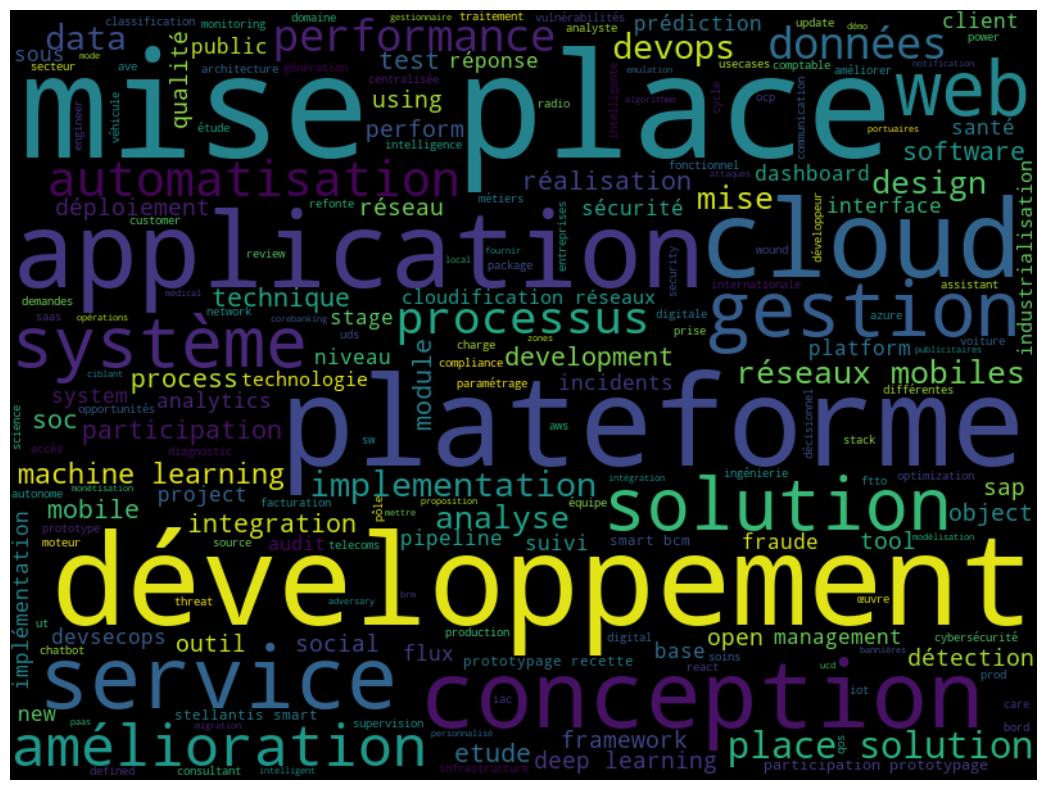

In [92]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
Cloud = WordCloud(width=800, height=600).generate(" ".join(data.Subject))
plt.figure(figsize=(16,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")


(-0.5, 799.5, 599.5, -0.5)

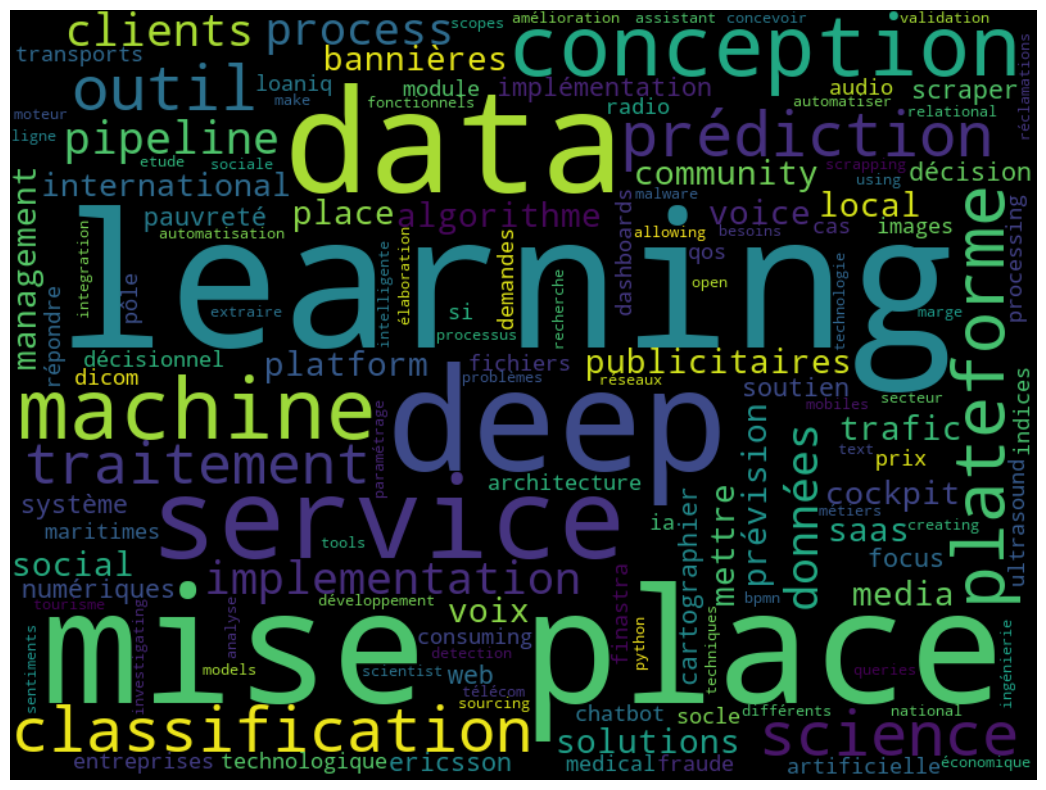

In [94]:
Cloud = WordCloud(width=800, height=600).generate(" ".join(data.query(""" Departement == "DATA" """).Subject))
plt.figure(figsize=(16,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")